In [123]:
# Import Libraries

import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import re
import os

## Clean and Prep Data for EDA

In [142]:
# Read data
url = 'https://data.cdc.gov/resource/i2vk-mgdh.csv'
data = pd.read_csv(url)

# Print unclean DataFrame first few rows
print("n\First few rows of the DataFrame:")
print(data.head())

# Print unclean DataFrame columns
print("\nColumn names:")
print(data.columns)

# Data Cleaning
clean_dataset = data[
    (data['data_value_footnote'] != 'Insufficient Data') &
    (data['geographiclevel'] != 'State')
].copy()  # Drop 'Insufficient Data' & Drop 'State'

columns_to_drop = [
    'datasource', 'data_value_footnote_symbol', 'data_value_unit',
    'stratificationcategory1', 'stratificationcategory2', 'data_value_footnote',
    'topicid', 'data_value_type', 'year', 'class', 'topic', 'geographiclevel',
]
clean_dataset.drop(columns=columns_to_drop, inplace=True)  # Drop Unnecessary Columns

clean_dataset.rename(columns={
    'data_value': 'per_100000_population', 'stratification1': 'gender',
    'stratification2': 'race', 'locationid': 'location', 'location_1': 'latitude_longitude',
    'locationabbr': 'state', 'locationdesc': 'county'
}, inplace=True)  # Rename columns for readability

# Remove parentheses and comma from latitude_longitude column
clean_dataset['latitude_longitude'] = clean_dataset['latitude_longitude'].str.replace('(', '').str.replace(')', '').str.replace(',', '')

# Drop rows with missing values
clean_dataset.dropna(inplace=True)

# Fill in remaining missing values with 0
clean_dataset.fillna(0, inplace=True)

# Outlier Detection and Treatment
z_scores = zscore(clean_dataset['per_100000_population'])
outliers = (z_scores > 3) | (z_scores < -3)
clean_dataset.loc[outliers, 'per_100000_population'] = clean_dataset['per_100000_population'].median()

# Data Preprocessing (Removes unwanted characters & all text to lowercase)
text_columns = clean_dataset.select_dtypes(include=['object']).columns
for col in text_columns:
    clean_dataset[col] = clean_dataset[col].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', str(x)))
    clean_dataset[col] = clean_dataset[col].str.lower()

# Summary Statistics
summary = clean_dataset.describe()
print(round(summary, 2), "\n")

# Print cleaned DataFrame first few rows
print("\nFirst few rows of the cleaned DataFrame:")
print(clean_dataset.head())
print("\nColumn names of the cleaned DataFrame:")
print(clean_dataset.columns)
print("\nLast few rows of the cleaned DataFrame:")
print(clean_dataset.tail())
print("\nSummary statistics oof the cleaned DataFrame:")
print(summary)
print("\nNumber of cleaned rows:", clean_dataset.shape[0])
print("Number of cleaned columns:", clean_dataset.shape[1])

# Save the cleaned dataset to a CSV file
clean_dataset.to_csv('clean_dataset(1).csv', index=False)

# Save to Desktop
home_directory = os.path.expanduser('~')
desktop_path = os.path.join(home_directory, 'Desktop')
file_path = os.path.join(desktop_path, 'clean_dataset(1).csv')
clean_dataset.to_csv(file_path, index=False)

n\First few rows of the DataFrame:
   year locationabbr    locationdesc geographiclevel datasource  \
0  2014           AK  Aleutians East          County       NVSS   
1  2014           AK  Aleutians West          County       NVSS   
2  2014           AK       Anchorage          County       NVSS   
3  2014           AK          Bethel          County       NVSS   
4  2014           AK     Bristol Bay          County       NVSS   

                     class                    topic  data_value  \
0  Cardiovascular Diseases  Heart Disease Mortality       105.3   
1  Cardiovascular Diseases  Heart Disease Mortality       211.9   
2  Cardiovascular Diseases  Heart Disease Mortality       257.9   
3  Cardiovascular Diseases  Heart Disease Mortality       351.6   
4  Cardiovascular Diseases  Heart Disease Mortality         NaN   

          data_value_unit                                    data_value_type  \
0  per 100,000 population  Age-adjusted, Spatially Smoothed, 3-year Avera...   

## Exploratory Data Analysis

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Countplot

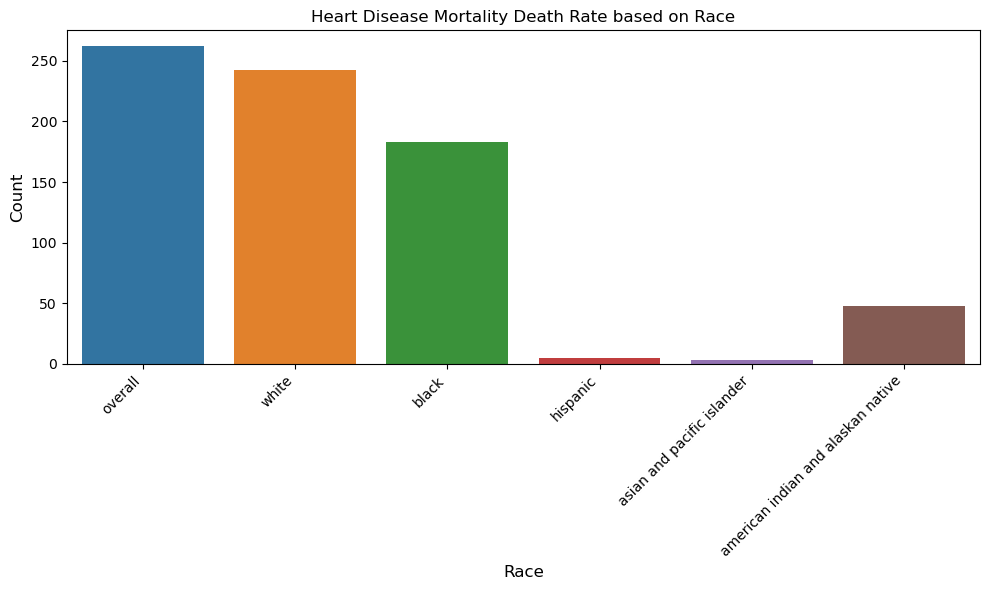

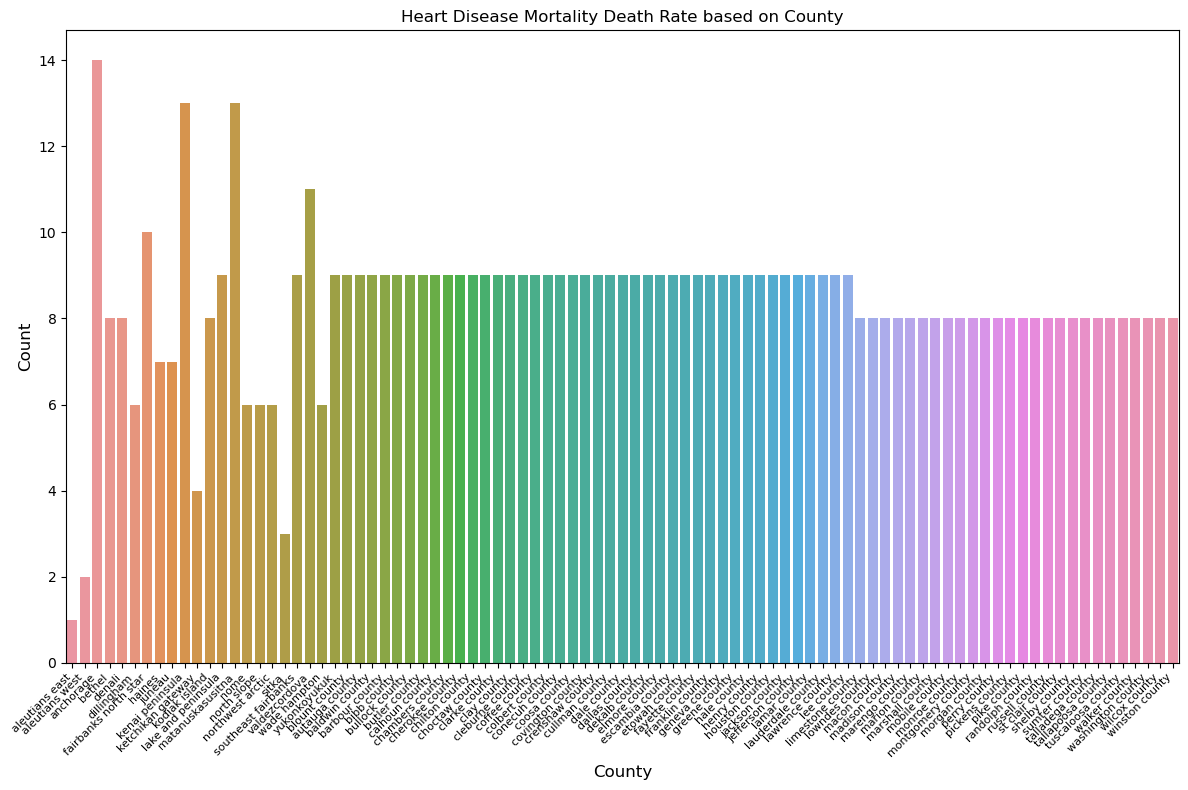

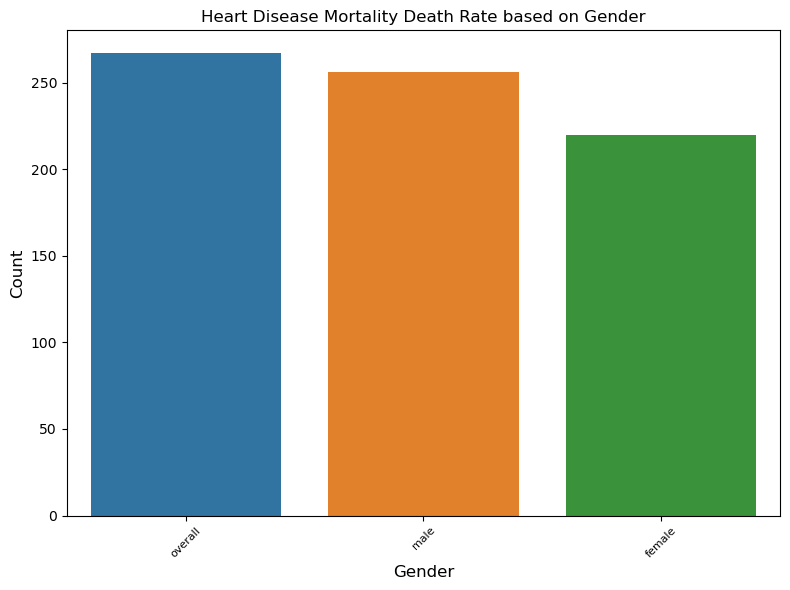

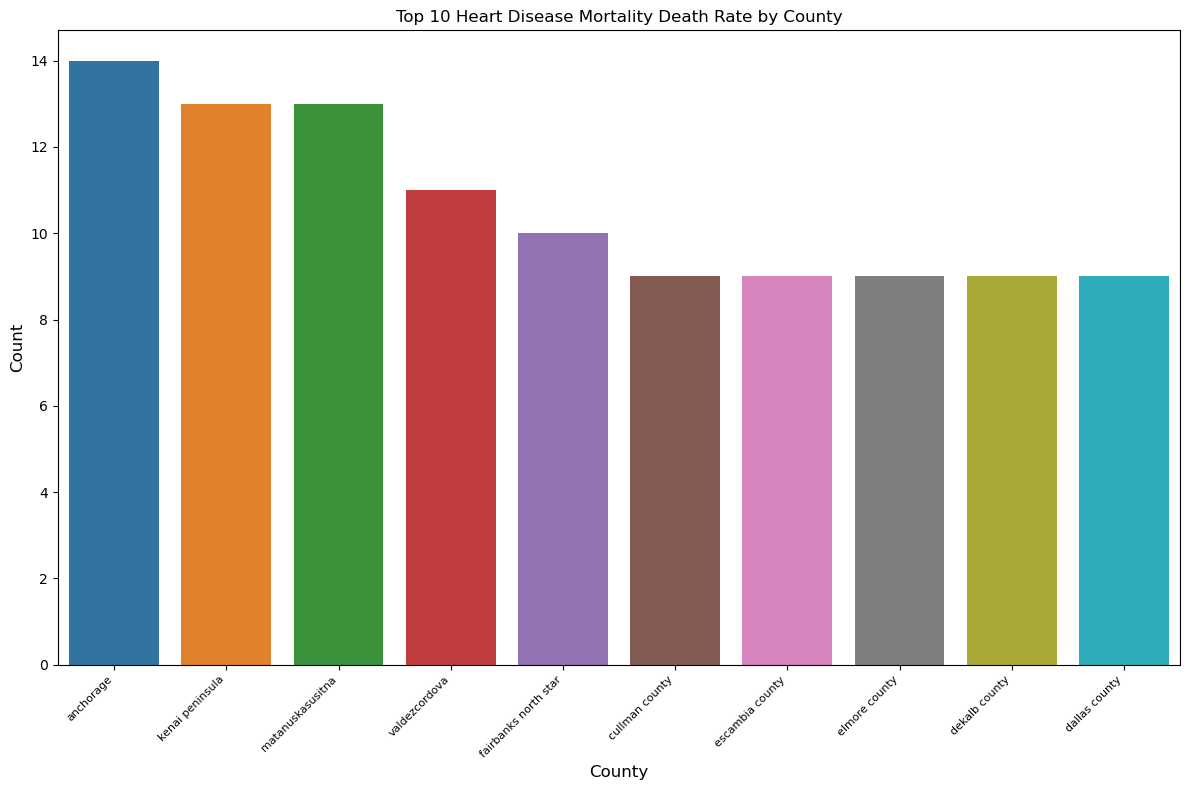

In [217]:
plt.figure(figsize=(10, 6))  # Countplot for Race
sns.countplot(data=clean_dataset, x='race')
plt.title('Heart Disease Mortality Death Rate based on Race', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels by 45 degrees and align them to the right
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

plt.figure(figsize=(12, 8))  # Countplot for County
sns.countplot(data=clean_dataset, x='county')
plt.title('Heart Disease Mortality Death Rate based on County', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Decrease font size
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

plt.figure(figsize=(8, 6))  # Countplot for Gender
sns.countplot(data=clean_dataset, x='gender')
plt.title('Heart Disease Mortality Death Rate based on Gender', fontsize=12)
plt.xticks(rotation=45, fontsize=8)  # Decrease font size
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Calculate the top 10 counties based on heart disease mortality death rate
top_counties = clean_dataset['county'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 counties
top_county_data = clean_dataset[clean_dataset['county'].isin(top_counties)]

# Create countplot for the top 10 counties
plt.figure(figsize=(12, 8))
sns.countplot(data=top_county_data, x='county', order=top_counties)
plt.title('Top 10 Heart Disease Mortality Death Rate by County', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

#### Boxplot

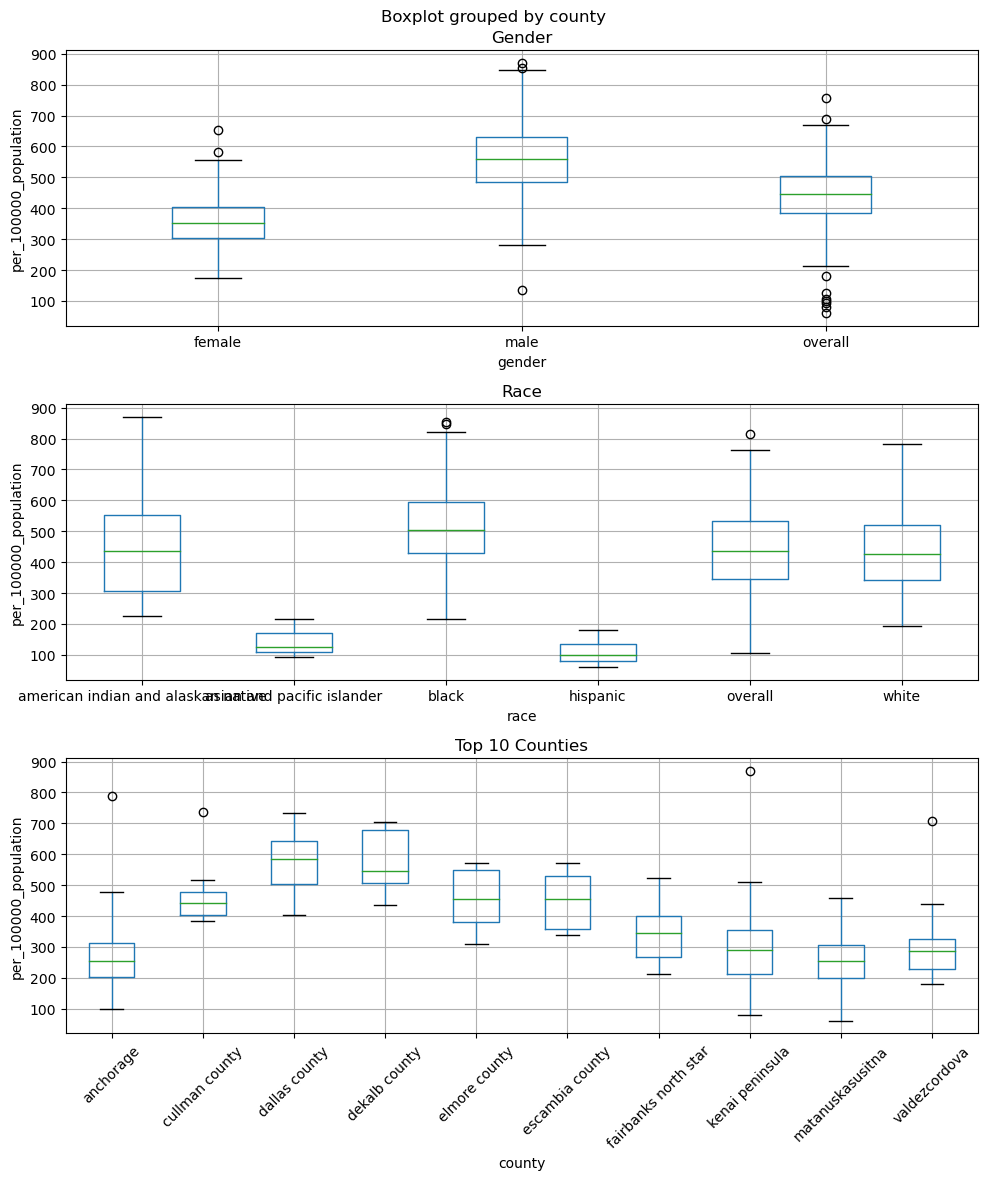

In [164]:
# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Box plot for Gender
clean_dataset.boxplot(column='per_100000_population', by='gender', ax=axes[0])
axes[0].set_title('Gender')
axes[0].set_ylabel('per_100000_population')

# Box plot for Race
clean_dataset.boxplot(column='per_100000_population', by='race', ax=axes[1])
axes[1].set_title('Race')
axes[1].set_ylabel('per_100000_population')

# Box plot for County (showing top 10 counties)
top_10_counties = clean_dataset['county'].value_counts().head(10).index
clean_dataset_top_10 = clean_dataset[clean_dataset['county'].isin(top_10_counties)]
clean_dataset_top_10.boxplot(column='per_100000_population', by='county', ax=axes[2])
axes[2].set_title('Top 10 Counties')
axes[2].set_ylabel('per_100000_population')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

#### Heatmap matrix

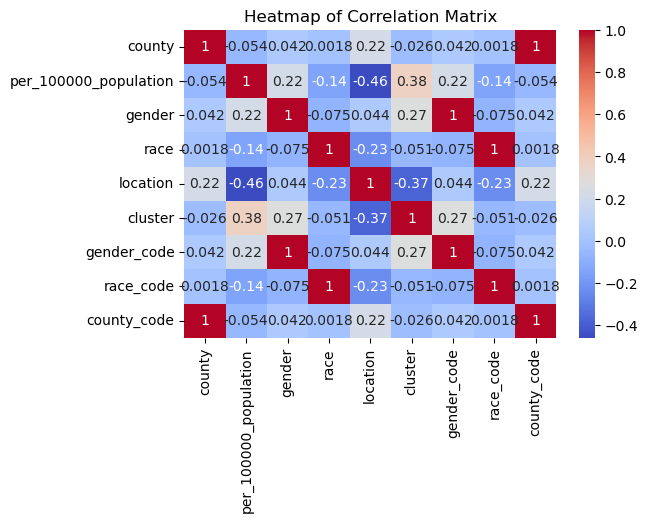

In [183]:
# Convert it to a list of column names
numerical_column = 'per_100000_population'  # Use the correct numerical column name
numerical_list = [numerical_column]

# Check if there are any missing values in the numerical columns
numerical_columns = clean_dataset.select_dtypes(include=['number'])  # Heatmap
if numerical_columns.isnull().any().any():
    print("There are missing values in the numerical columns. Please handle them before calculating the correlation.")
else:
    plt.figure(figsize=(6, 4))  # Plot Heatmap
    sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap of Correlation Matrix', fontsize=12)
    plt.show()

#### ANOVA Test

In [ ]:
from scipy.stats import f_oneway

In [200]:
# Perform ANOVA Test for gender
male_data = clean_dataset['per_100000_population'][clean_dataset['gender'] == 'Male']
female_data = clean_dataset['per_100000_population'][clean_dataset['gender'] == 'Female']

if len(male_data) > 0 and len(female_data) > 0:
    f_stat_gender, p_value_gender = f_oneway(male_data, female_data)
    print("ANOVA Test Results for Gender:")
    print("F-statistic:", f_stat_gender)
    print("p-value:", p_value_gender)
else:
    print("Insufficient data for ANOVA Test for Gender")

# Perform ANOVA Test for race
white_data = clean_dataset['per_100000_population'][clean_dataset['race'] == 'White']
black_data = clean_dataset['per_100000_population'][clean_dataset['race'] == 'Black']
asian_data = clean_dataset['per_100000_population'][clean_dataset['race'] == 'Asian']

if len(white_data) > 0 and len(black_data) > 0 and len(asian_data) > 0:
    f_stat_race, p_value_race = f_oneway(white_data, black_data, asian_data)
    print("\nANOVA Test Results for Race:")
    print("F-statistic:", f_stat_race)
    print("p-value:", p_value_race)
else:
    print("\nInsufficient data for ANOVA Test for Race")

# ANOVA Test for county
grouped_data = clean_dataset.groupby('county')  # Group the data by county
data_by_county = []  # Initialize a list to store the data for each county
for county, group in grouped_data:
    data_by_county.append(group['per_100000_population'])  # Iterate over the groups and extract the data for each county
print("\nCounty:")
print("F-statistic:", round(f_stat_geo, 2))
print("p-value:", p_value_geo)

Insufficient data for ANOVA Test for Gender

Insufficient data for ANOVA Test for Race

County:
F-statistic: 4.93
p-value: 1.491168742431827e-33


#### Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency

In [115]:
# Chi-square test for gender
contingency_gender = pd.crosstab(clean_dataset['per_100000_population'], clean_dataset['gender'])
chi2_stat_gender, p_val_gender, _, _ = chi2_contingency(contingency_gender)
chi2_stat_gender_rounded = round(chi2_stat_gender, 2)
p_val_gender_rounded = round(p_val_gender, 2)

# Chi-square test for race
contingency_race = pd.crosstab(clean_dataset['per_100000_population'], clean_dataset['race'])
chi2_stat_race, p_val_race, _, _ = chi2_contingency(contingency_race)
chi2_stat_race_rounded = round(chi2_stat_race, 2)
p_val_race_rounded = round(p_val_race, 2)

# Chi-square test for county
contingency_geo = pd.crosstab(clean_dataset['per_100000_population'], clean_dataset['county'])
chi2_stat_geo, p_val_geo, _, _ = chi2_contingency(contingency_geo)
chi2_stat_geo_rounded = round(chi2_stat_geo, 2)
p_val_geo_rounded = round(p_val_geo, 2)

# Create a DataFrame for the chi-square statistics and p-values
data = {
    'Category': ['gender', 'race', 'county'],
    'Chi-square statistic': [chi2_stat_gender_rounded, chi2_stat_race_rounded, chi2_stat_geo_rounded],
    'p-value': [p_val_gender_rounded, p_val_race_rounded, p_val_geo_rounded]
}

# Create the DataFrame for Chi-Square test
chi_square_df = pd.DataFrame(data)

# Print the DataFrame
print(chi_square_df)

  Category  Chi-square statistic  p-value
0   gender               1391.87     0.32
1     race               3428.08     0.46
2   county              60238.79     0.45


#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

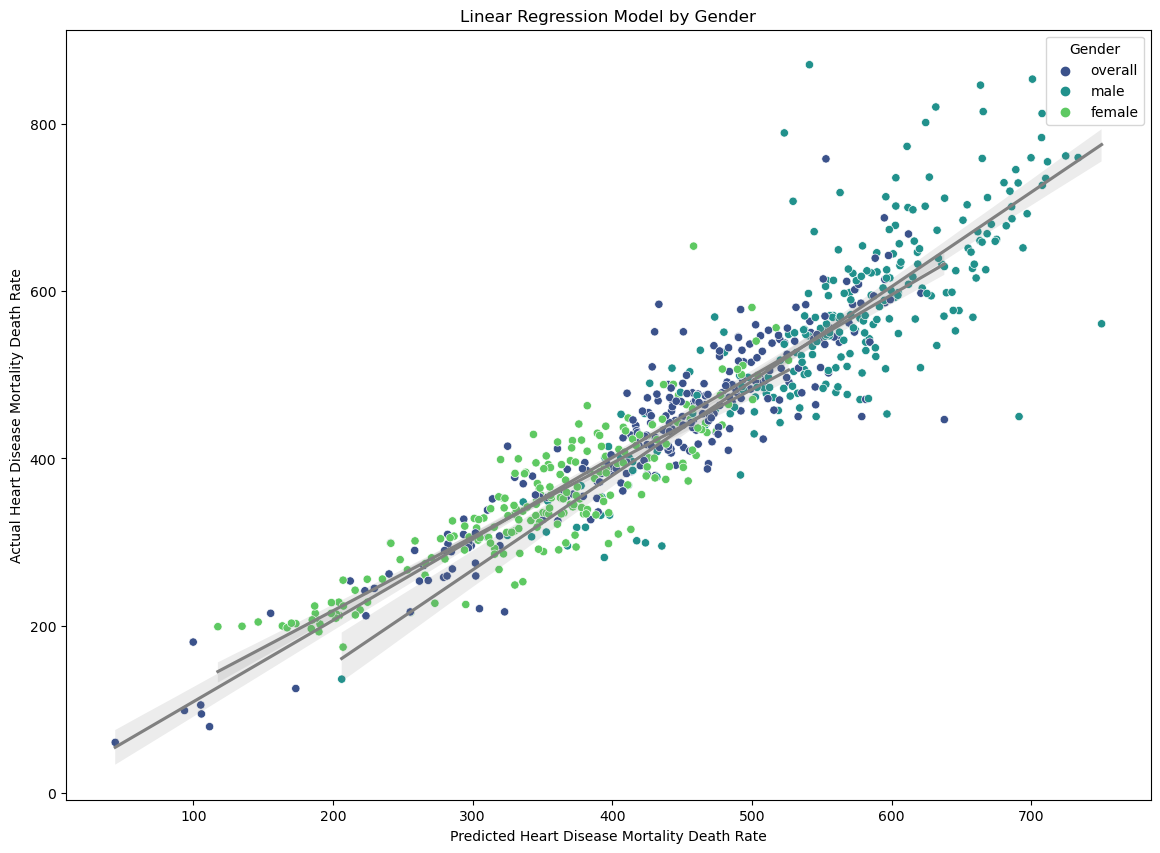

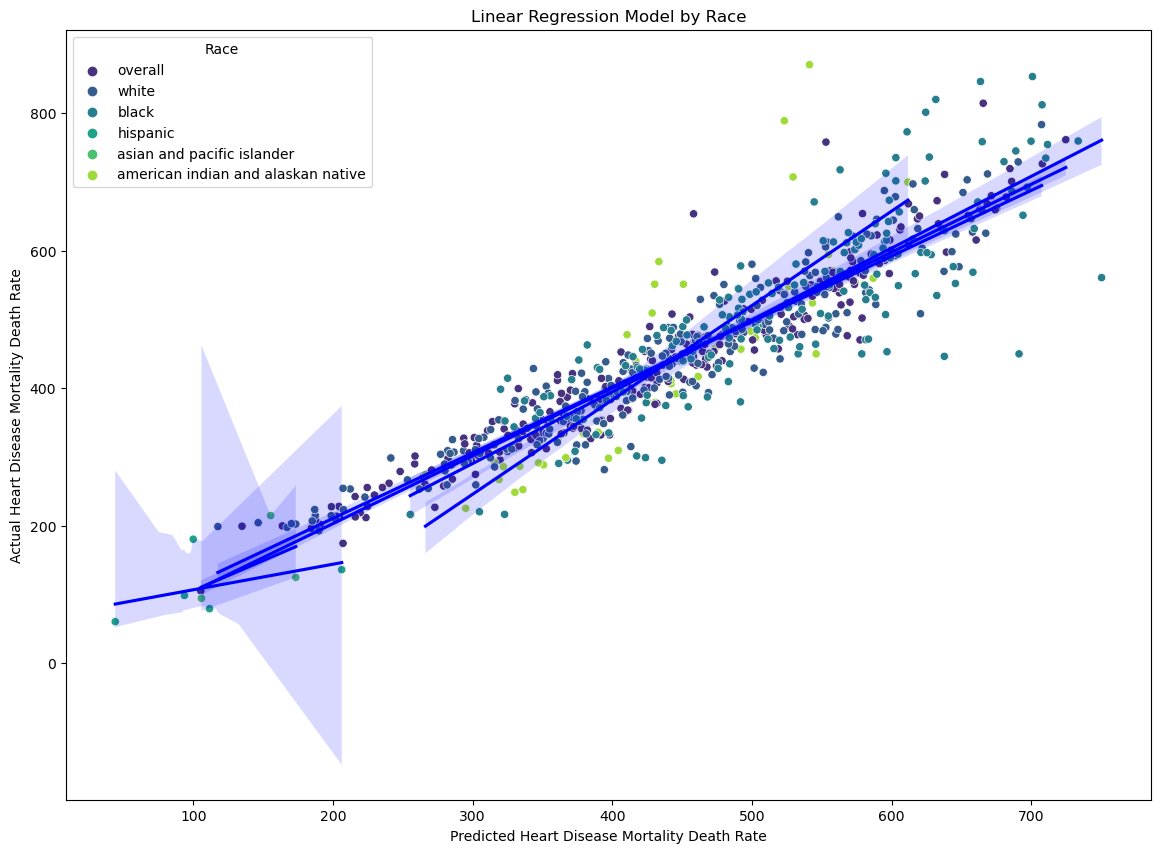

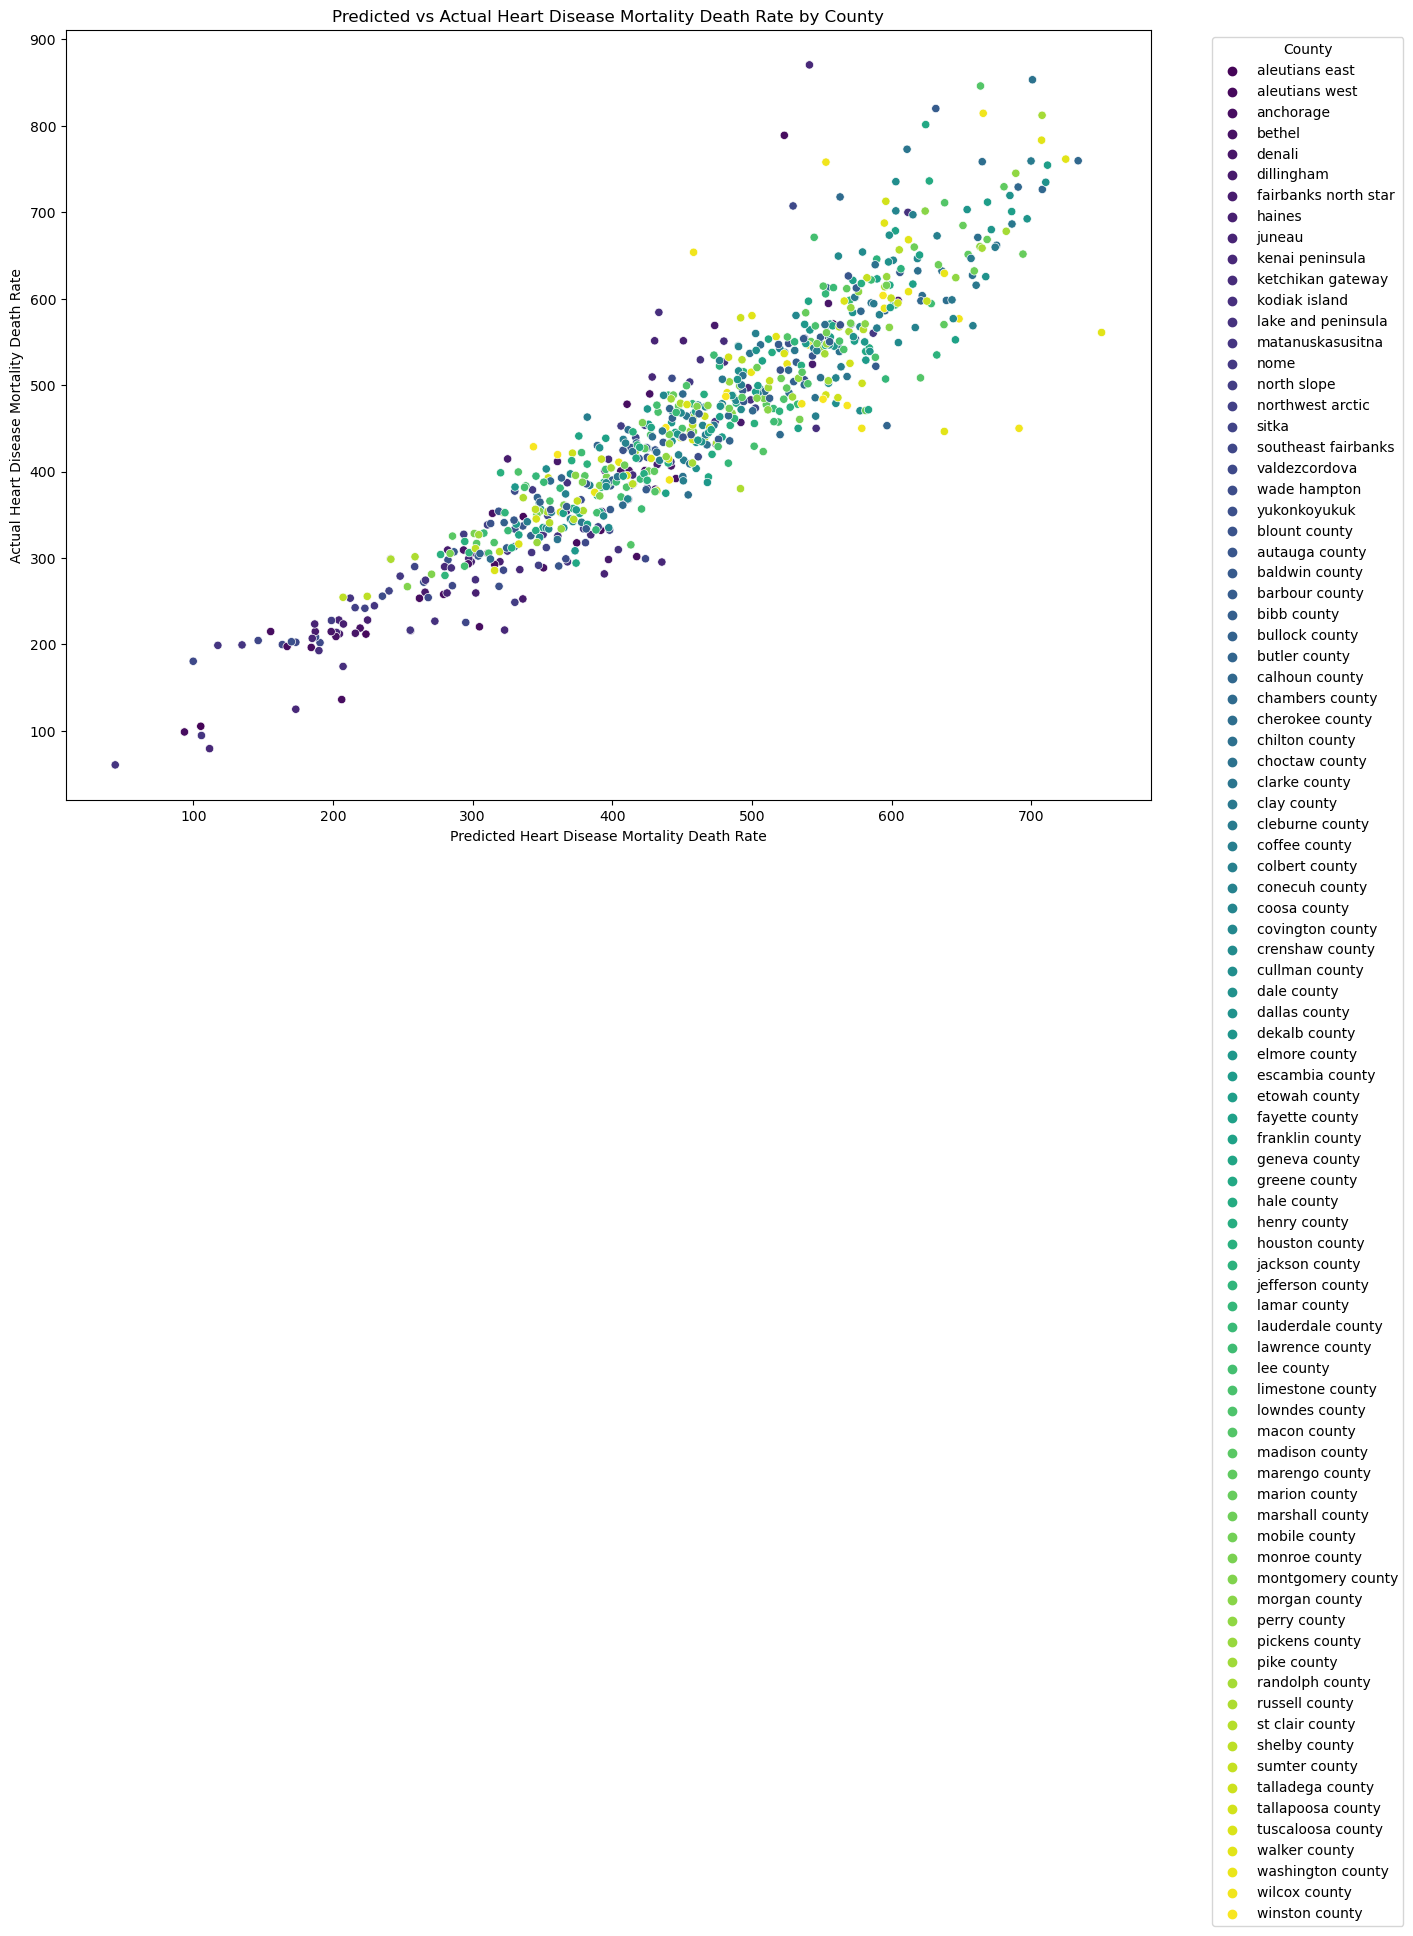

In [236]:
# Selecting relevant columns
X = clean_dataset[['gender', 'race', 'county']]
y = clean_dataset['per_100000_population']

# Define preprocessing steps for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['gender', 'race', 'county'])  # One-hot encode categorical variables
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Linear regression model
])

# Fit the pipeline on the data
pipeline.fit(X, y)

# Predict heart disease mortality death rate
y_pred = pipeline.predict(X)

# Plot linear regression for each category separately
# Plot for Gender
plt.figure(figsize=(14, 10))
sns.scatterplot(data=clean_dataset, x=y_pred, y=y, hue='gender', palette='viridis', legend='full')
for category in clean_dataset['gender'].unique():
    category_mask = (clean_dataset['gender'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='gray')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Gender')
plt.legend(title='Gender')
plt.show()

# Plot for Race
plt.figure(figsize=(14, 10))
sns.scatterplot(data=clean_dataset, x=y_pred, y=y, hue='race', palette='viridis', legend='full')
for category in clean_dataset['race'].unique():
    category_mask = (clean_dataset['race'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='blue')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Race')
plt.legend(title='Race')
plt.show()

# Plot for County
plt.figure(figsize=(14, 10))
sns.scatterplot(data=clean_dataset, x=y_pred, y=y, hue='county', palette='viridis')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Predicted vs Actual Heart Disease Mortality Death Rate by County')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()